# 设置默认的TensorFlow版本为1.X

In [ ]:
%tensorflow_version 1.x # Select module of the tensorflow

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # Select module of the tensorflow`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


# 安装必要的依赖库

In [ ]:
!pip install tensorflow
!pip install dataset_utils
!pip install tf_slim
!pip install object_detection

  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=970a8a1ef9de3abdcd8a288c50e1494e92f601922c35986db8c4fda3e1e805b0
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
     |████████████████████████████████| 1.2MB 38.4MB/s 
     |████████████████████████████████| 481kB 28.5MB/s 
  Created wheel for alembic: filename=alembic-1.5.5-py2.py3-none-any.whl size=156597 sha256=26b5ae06b9570196c03969274a47e40cdf125e2c5c281b37b9af11f9f7f981b0
  Stored in directory: /root/.cache/pip/wheels/74/3f/61/7de6e3cef766d2680a5d81b1a388286e640f6a681eb589d643
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75675 sha256=26347c40aab3d589cef2830e192ad4aaf9776546156d5535f3cfee1f6b407b64
  Stored in directory: /root/.cache/pip/wheels/ad/10/d3/aeb26e20d19045e2a68e5d3cbb57

# 搭建gonrk,显示TensorFlowBoard

In [ ]:
%cd /content/
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip
#the logs that are created while training 
LOG_DIR = "/content/models/trained"
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
#The link to tensorboard.
#works after the training starts.
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"


/content
--2021-02-21 07:14:15--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.196.3.7, 34.225.127.47, 3.228.103.136, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.196.3.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  36.8MB/s    in 0.4s    

2021-02-21 07:14:15 (36.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://d21a86e3c4a3.ngrok.io


# 下载物体检测模型并配置protobuf环境

In [ ]:
%cd 
!git clone https://github.com/tensorflow/models.git # Import required files from the website
!wget -O protobuf.zip https://github.com/google/protobuf/releases/download/v3.0.0/protoc-3.0.0-linux-x86_64.zip
!unzip protobuf.zip
%cd /root/models/research/
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'
!/root/bin/protoc object_detection/protos/*.proto --python_out=.

/root
Cloning into 'models'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 52077 (delta 43), reused 57 (delta 11), pack-reused 51980
Receiving objects: 100% (52077/52077), 569.13 MiB | 36.16 MiB/s, done.
Resolving deltas: 100% (35521/35521), done.
--2021-02-21 07:14:35--  https://github.com/google/protobuf/releases/download/v3.0.0/protoc-3.0.0-linux-x86_64.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/protocolbuffers/protobuf/releases/download/v3.0.0/protoc-3.0.0-linux-x86_64.zip [following]
--2021-02-21 07:14:35--  https://github.com/protocolbuffers/protobuf/releases/download/v3.0.0/protoc-3.0.0-linux-x86_64.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location:

# 检验环境是否搭建错误


In [ ]:
!python object_detection/builders/model_builder_test.py

# 下载预渲染模型

In [ ]:
%cd ~/models

import os
import shutil
import glob
import urllib
import tarfile
from requests import get

MODEL = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = 'pretrained_model'

if not (os.path.exists(MODEL_FILE)):
  with open(MODEL_FILE, "wb") as file:
    # get request
    response = get(DOWNLOAD_BASE + MODEL_FILE)
    # write to file
    file.write(response.content)
    #opener = urllib.URLopener()
    #opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
  shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/root/models


用文本编辑器打开ssd_mobilenet_v1_coco.config文件，如下所示
```
# SSD with Mobilenet v1 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.
'''
需修改5处
1、train_input_reader: {
  tf_record_input_reader {
    input_path: "PATH_TO_BE_CONFIGURED/mscoco_train.record"
  }
  label_map_path: "PATH_TO_BE_CONFIGURED/mscoco_label_map.pbtxt"
}
这的input_path是训练数据的路径，改为对应的路径，这里是input_path:data/train.record
这的label_map_path是label路径，这里是label_map_path:data/ZJL_CYX.pbtxt
2、eval_input_reader: {
  tf_record_input_reader {
    input_path: "PATH_TO_BE_CONFIGURED/mscoco_val.record"
  }
  label_map_path: "PATH_TO_BE_CONFIGURED/mscoco_label_map.pbtxt"
  shuffle: false
  num_readers: 1
}
这的input_path是测试数据的路径，改为对应的路径，这里是input_path:data/test.record
这的label_map_path是label路径，这里是label_map_path:data/ZJL_CYX.pbtxt
3、ssd {
    num_classes: 90
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
num_classes是标签类别数，这里只有杰伦和奕迅，所以 num_classes: 2
4、train_config: {
  batch_size: 24
  optimizer {
    rms_prop_optimizer: {
      learning_rate: {
        exponential_decay_learning_rate {
          initial_learning_rate: 0.004
          decay_steps: 800720
          decay_factor: 0.95
        }
      }
      momentum_optimizer_value: 0.9
      decay: 0.9
      epsilon: 1.0
    }
}
batch_size是每次迭代的数据数，我这里设为1
5、fine_tune_checkpoint: "ssd_mobilenet_v1_coco_11_06_2017/model.ckpt"
  from_detection_checkpoint: true
这两行注释掉或者删除掉，否则会运行很慢
'''
model {
  ssd {
    num_classes: 90
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 3.0
        aspect_ratios: 0.3333
      }
    }
    image_resizer {
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    box_predictor {
      convolutional_box_predictor {
        min_depth: 0
        max_depth: 0
        num_layers_before_predictor: 0
        use_dropout: false
        dropout_keep_probability: 0.8
        kernel_size: 1
        box_code_size: 4
        apply_sigmoid_to_scores: false
        conv_hyperparams {
          activation: RELU_6,
          regularizer {
            l2_regularizer {
              weight: 0.00004
            }
          }
          initializer {
            truncated_normal_initializer {
              stddev: 0.03
              mean: 0.0
            }
          }
          batch_norm {
            train: true,
            scale: true,
            center: true,
            decay: 0.9997,
            epsilon: 0.001,
          }
        }
      }
    }
    feature_extractor {
      type: 'ssd_mobilenet_v1'
      min_depth: 16
      depth_multiplier: 1.0
      conv_hyperparams {
        activation: RELU_6,
        regularizer {
          l2_regularizer {
            weight: 0.00004
          }
        }
        initializer {
          truncated_normal_initializer {
            stddev: 0.03
            mean: 0.0
          }
        }
        batch_norm {
          train: true,
          scale: true,
          center: true,
          decay: 0.9997,
          epsilon: 0.001,
        }
      }
    }
    loss {
      classification_loss {
        weighted_sigmoid {
        }
      }
      localization_loss {
        weighted_smooth_l1 {
        }
      }
      hard_example_miner {
        num_hard_examples: 3000
        iou_threshold: 0.99
        loss_type: CLASSIFICATION
        max_negatives_per_positive: 3
        min_negatives_per_image: 0
      }
      classification_weight: 1.0
      localization_weight: 1.0
    }
    normalize_loss_by_num_matches: true
    post_processing {
      batch_non_max_suppression {
        score_threshold: 1e-8
        iou_threshold: 0.6
        max_detections_per_class: 100
        max_total_detections: 100
      }
      score_converter: SIGMOID
    }
  }
}

train_config: {
  batch_size: 24
  optimizer {
    rms_prop_optimizer: {
      learning_rate: {
        exponential_decay_learning_rate {
          initial_learning_rate: 0.004
          decay_steps: 800720
          decay_factor: 0.95
        }
      }
      momentum_optimizer_value: 0.9
      decay: 0.9
      epsilon: 1.0
    }
  }
  fine_tune_checkpoint: "PATH_TO_BE_CONFIGURED/model.ckpt"
  from_detection_checkpoint: true
  # Note: The below line limits the training process to 200K steps, which we
  # empirically found to be sufficient enough to train the pets dataset. This
  # effectively bypasses the learning rate schedule (the learning rate will
  # never decay). Remove the below line to train indefinitely.
  num_steps: 200000
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
  data_augmentation_options {
    ssd_random_crop {
    }
  }
}

train_input_reader: {
  tf_record_input_reader {
    input_path: "PATH_TO_BE_CONFIGURED/mscoco_train.record"
  }
  label_map_path: "PATH_TO_BE_CONFIGURED/mscoco_label_map.pbtxt"
}

eval_config: {
  num_examples: 8000
  # Note: The below line limits the evaluation process to 10 evaluations.
  # Remove the below line to evaluate indefinitely.
  max_evals: 10
}

eval_input_reader: {
  tf_record_input_reader {
    input_path: "PATH_TO_BE_CONFIGURED/mscoco_val.record"
  }
  label_map_path: "PATH_TO_BE_CONFIGURED/mscoco_label_map.pbtxt"
  shuffle: false
  num_readers: 1
}
```

In [ ]:
# shutil.move("/root/models/research/object_detection/samples/configs/ssd_mobilenet_v1_coco.config", "/root/models") 
# !cp /root/models/ssd_mobilenet_v1_coco.config /content/ssd_mobilenet_v1_coco.config

# 准备训练

In [ ]:
# 移除 存在的缓存文件
!rm -rf /content/fine_tuned_model/
!rm -rf /content/training/

In [ ]:
!python /root/models/research/object_detection/legacy/train.py --logtostderr --train_dir=/content/training/ --pipeline_config_path=/content/ssd_mobilenet_v1_coco.config

Instructions for updating:
Use object_detection/model_main.py.
W0221 07:14:44.949998 140614680545152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:251: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.
Instructions for updating:
Please switch to tf.train.create_global_step
W0221 07:14:44.968458 140614680545152 deprecation.py:323] From /root/models/research/object_detection/legacy/trainer.py:265: create_global_step (from tf_slim.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.create_global_step
INFO:tensorflow:Reading unweighted datasets: ['/content/train.record']
I0221 07:14:44.982823 140614680545152 dataset_builder.py:163] Reading unweighted datasets: ['/content/train.record']
INFO:tensorflow:Reading record datasets for input file: ['/content/train.record']
I0221 07:14:44.983960 140614680545152

In [ ]:

#Export trained model 
!python /root/models/research/object_detection/export_inference_graph.py \
   --input_type=image_tensor \
   --pipeline_config_path=/content/ssd_mobilenet_v1_coco.config \
   --output_directory=/content/fine_tuned_model \
   --trained_checkpoint_prefix=/content/training/model.ckpt-500

Instructions for updating:
Please use `layer.__call__` method instead.
W0221 07:15:57.886208 140457241315200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0221 07:15:59.238382 140457241315200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0221 07:15:59.273483 140457241315200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0221 07:15:59.307007 140457241315200 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

In [ ]:
# !/root/bin/protoc
%cd /root/models/research/
!/root/bin/protoc object_detection/protos/*.proto --python_out=.


/root/models/research


# 检验效果

In [ ]:
%cd /root/models/research
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

import pathlib
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

from object_detection.utils import ops as utils_ops
# from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
# This is needed to display the images.
%matplotlib inline
# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/content/fine_tuned_model' + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/object-detection.pbtxt'

NUM_CLASSES = 1


detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph) 
    tf.import_graph_def(od_graph_def, name='')

# label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
# categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
# category_index = label_map_util.create_category_index(categories)

# 如果是png图片,这里需要设置为4,如果是jpg图片这里需要设置为3
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# For the sake of simplicity we will use only 5 images:
# from image1.jpg
# to image5.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/content/test'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.png'.format(i)) for i in range(1, 7) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


/root/models/research


In [ ]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict


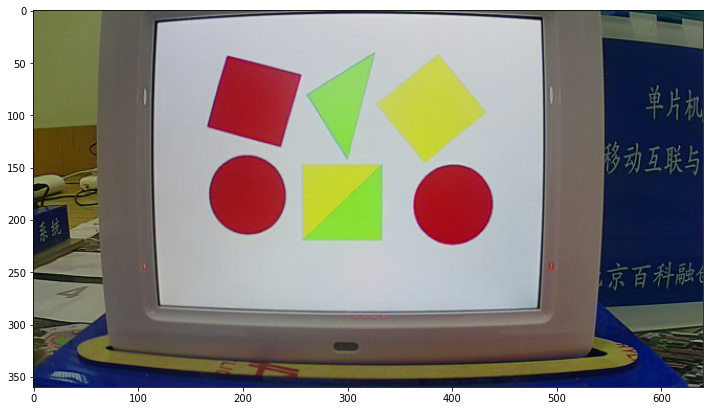

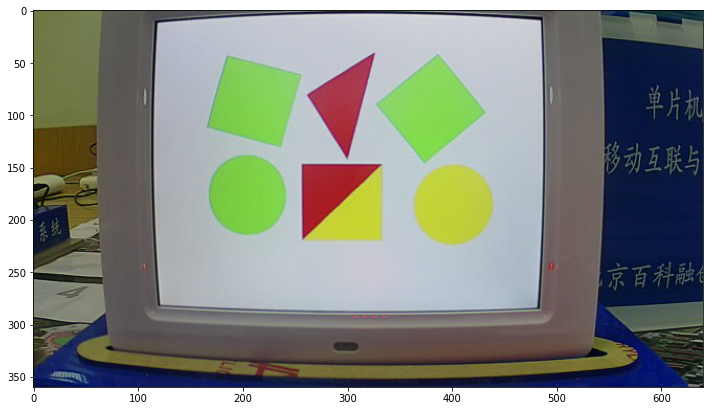

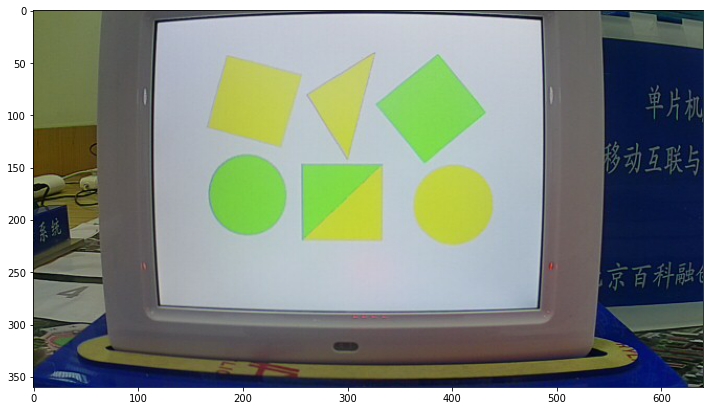

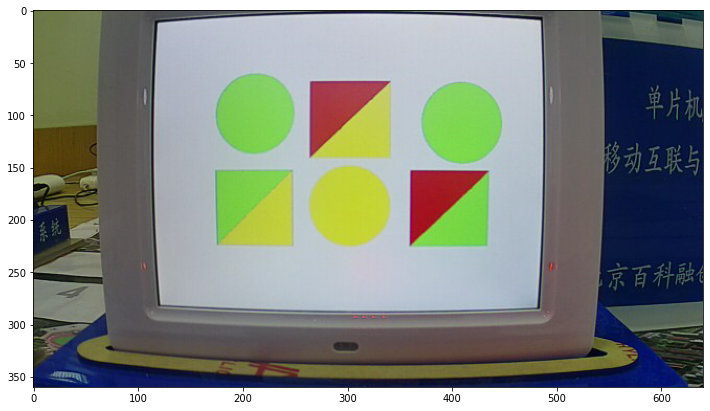

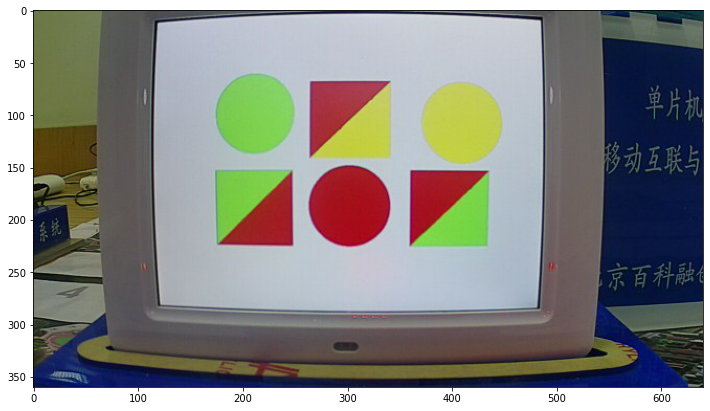

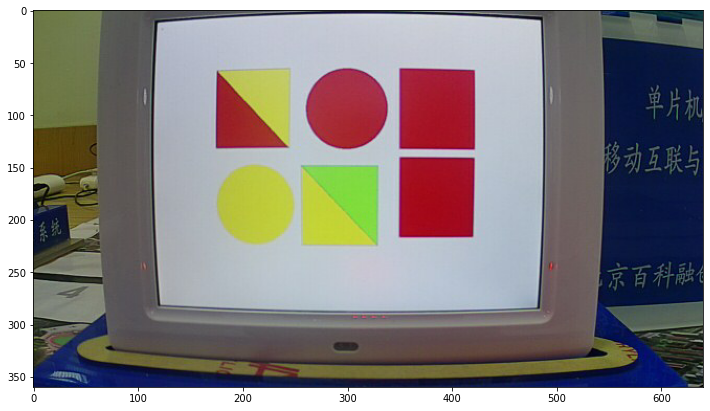

In [ ]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  image = image.convert('RGB') # 把四通道的png转换成为jpg
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      {1: {'id': 1, 'name': 'rect'}},# 这里还需要设置相应的类别
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)